# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [34]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


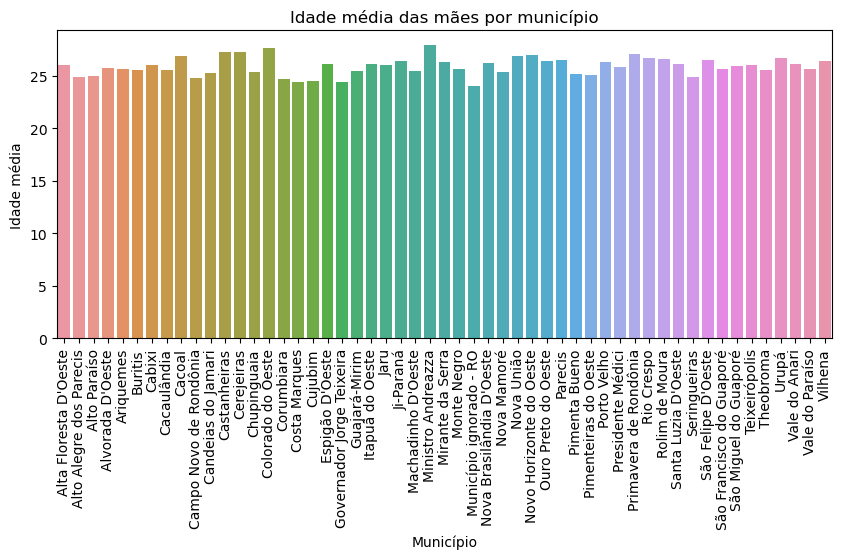

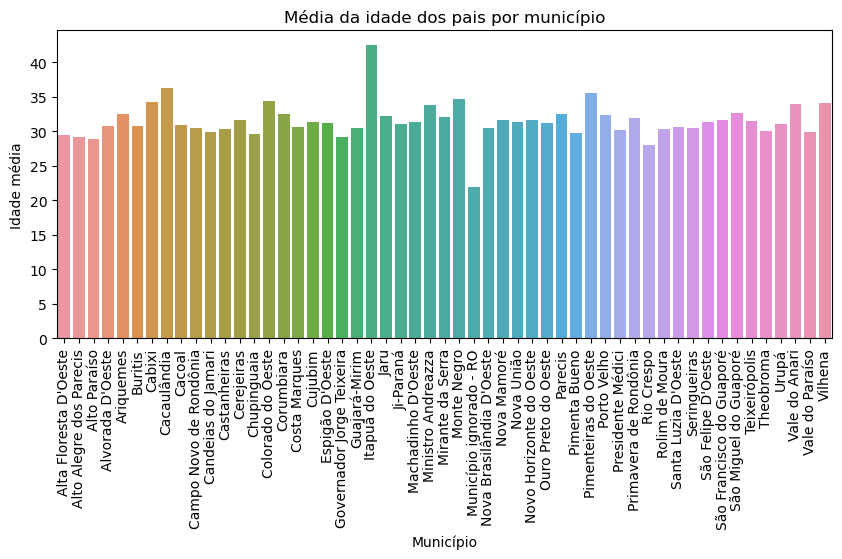

In [36]:
#media_idade = sinasc_raw.groupby('munResNome')['IDADEMAE', 'IDADEPAI'].mean()
media_idade = sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean()

# Gráfico da idade média das mães
plt.figure(figsize=(10, 4))
sns.barplot(x=media_idade.index, y=media_idade['IDADEMAE'])
plt.title('Idade média das mães por município')
plt.xlabel('Município')
plt.ylabel('Idade média')
plt.xticks(rotation=90)
plt.show()

# Gráfico da média da idade dos pais
plt.figure(figsize=(10, 4))
sns.barplot(x=media_idade.index, y=media_idade['IDADEPAI'])
plt.title('Média da idade dos pais por município')
plt.xlabel('Município')
plt.ylabel('Idade média')
plt.xticks(rotation=90)
plt.show()

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

<Figure size 1000x600 with 0 Axes>

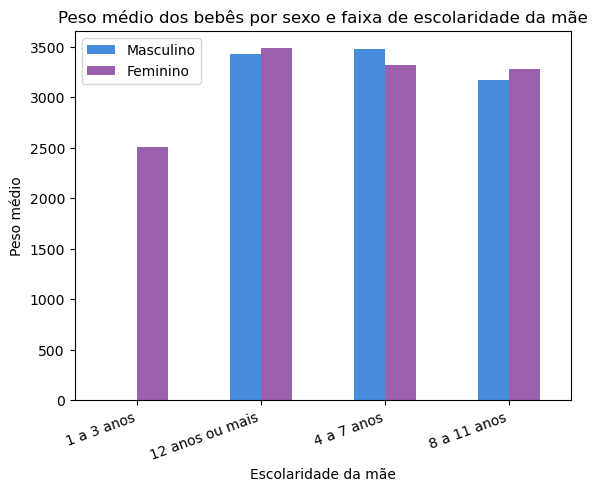

In [44]:
sinasc_filtered = sinasc_raw[sinasc_raw['DTNASC'] == '2019-08-05']
media_peso = sinasc_filtered.groupby(['ESCMAE', 'SEXO'])['PESO'].mean()

plt.figure(figsize=(10, 6))
media_peso.unstack().plot(kind='bar', color=['#488CDD', '#9A62AE'])
plt.xticks(rotation=20, ha='right')
plt.xlabel('Escolaridade da mãe')
plt.ylabel('Peso médio')
plt.title('Peso médio dos bebês por sexo e faixa de escolaridade da mãe')
plt.legend(['Masculino', 'Feminino'])
plt.show()

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

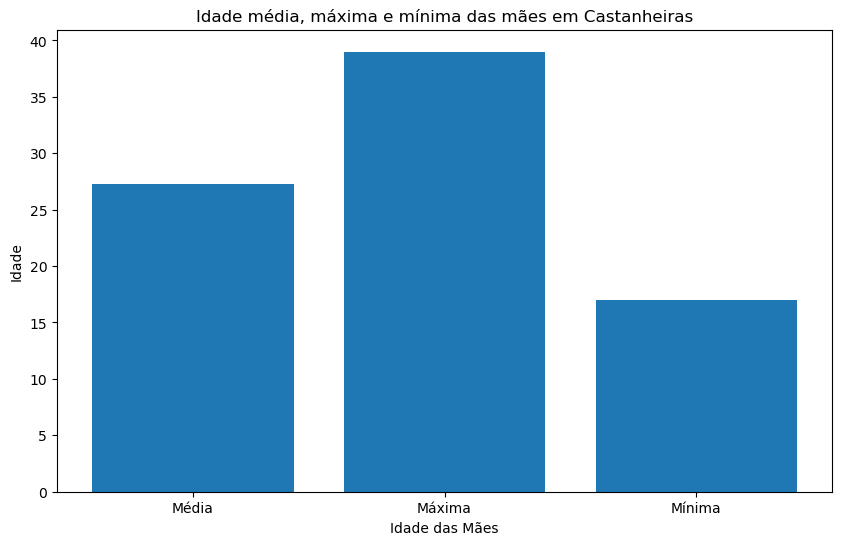

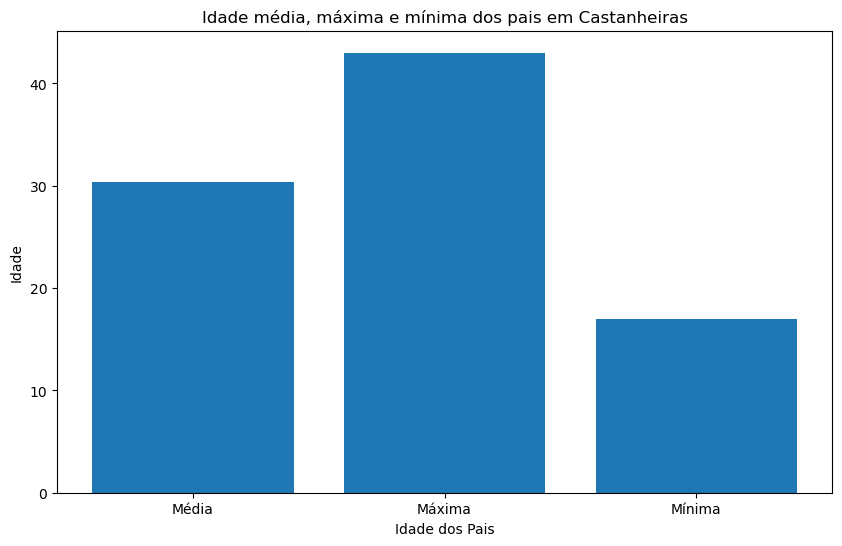

In [45]:
contagem_municipios = sinasc_raw['munResNome'].value_counts()
contagem_municipios = contagem_municipios.drop('Município ignorado - RO')

municipio_menos_bebes = contagem_municipios.idxmin()

sinasc_municipio_menos_bebes = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos_bebes]

# Gráfico das idades média, máxima e mínima das mães
idade_media_maes = sinasc_municipio_menos_bebes['IDADEMAE'].mean()
idade_maxima_maes = sinasc_municipio_menos_bebes['IDADEMAE'].max()
idade_minima_maes = sinasc_municipio_menos_bebes['IDADEMAE'].min()

plt.figure(figsize=(10, 6))
plt.bar(['Média', 'Máxima', 'Mínima'], [idade_media_maes, idade_maxima_maes, idade_minima_maes])
plt.xlabel('Idade das Mães')
plt.ylabel('Idade')
plt.title(f'Idade média, máxima e mínima das mães em {municipio_menos_bebes}')
plt.show()

# Gráfico das idades média, máxima e mínima dos pais
idade_media_pais = sinasc_municipio_menos_bebes['IDADEPAI'].mean()
idade_maxima_pais = sinasc_municipio_menos_bebes['IDADEPAI'].max()
idade_minima_pais = sinasc_municipio_menos_bebes['IDADEPAI'].min()

plt.figure(figsize=(10, 6))
plt.bar(['Média', 'Máxima', 'Mínima'], [idade_media_pais, idade_maxima_pais, idade_minima_pais])
plt.xlabel('Idade dos Pais')
plt.ylabel('Idade')
plt.title(f'Idade média, máxima e mínima dos pais em {municipio_menos_bebes}')
plt.show()

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



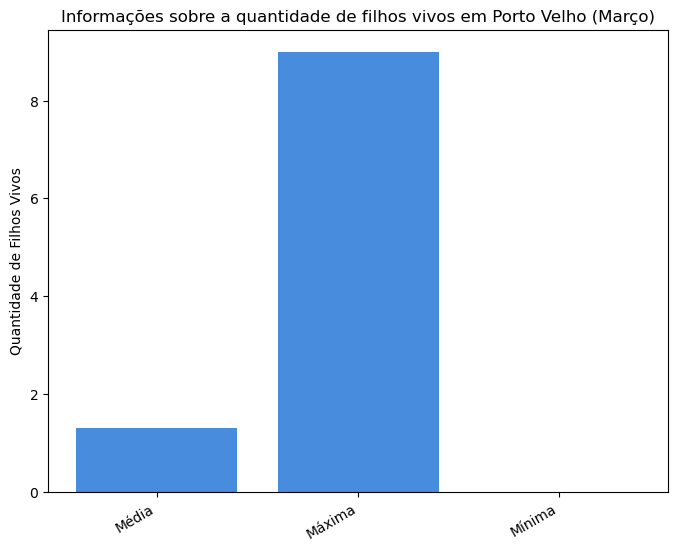

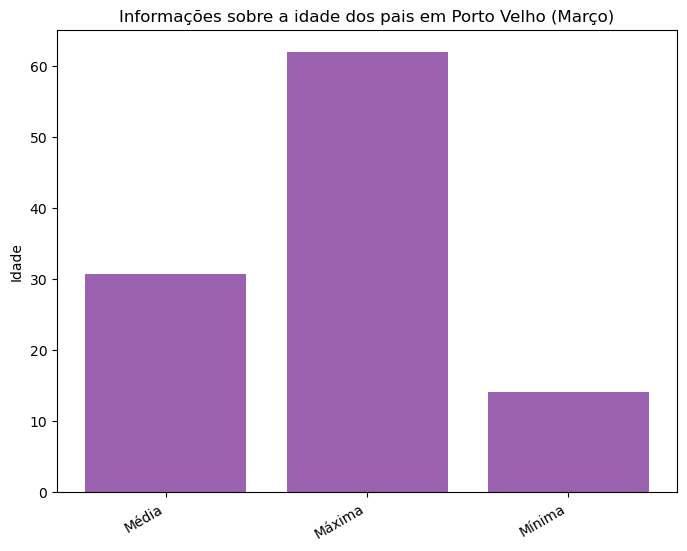

In [46]:
sinasc_marco = sinasc_raw[pd.to_datetime(sinasc_raw['DTNASC']).dt.month == 3]

bebês_por_município_marco = sinasc_marco['munResNome'].value_counts()

município_mais_bebês_marco = bebês_por_município_marco.idxmax()

dados_município_marco = sinasc_marco[sinasc_marco['munResNome'] == município_mais_bebês_marco]

quantidade_filhos_vivos_media = dados_município_marco['QTDFILVIVO'].mean()
quantidade_filhos_vivos_maxima = dados_município_marco['QTDFILVIVO'].max()
quantidade_filhos_vivos_minima = dados_município_marco['QTDFILVIVO'].min()

idade_pais_media = dados_município_marco[['IDADEPAI', 'IDADEMAE']].mean().mean()
idade_pais_maxima = dados_município_marco[['IDADEPAI', 'IDADEMAE']].max().max()
idade_pais_minima = dados_município_marco[['IDADEPAI', 'IDADEMAE']].min().min()

plt.figure(figsize=(8, 6))
plt.bar(['Média', 'Máxima', 'Mínima'], [quantidade_filhos_vivos_media, quantidade_filhos_vivos_maxima, quantidade_filhos_vivos_minima], color='#488CDD')
plt.ylabel('Quantidade de Filhos Vivos')
plt.title(f'Informações sobre a quantidade de filhos vivos em {município_mais_bebês_marco} (Março)')
plt.xticks(rotation=30, ha='right')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(['Média', 'Máxima', 'Mínima'], [idade_pais_media, idade_pais_maxima, idade_pais_minima], color='#9A62AE')
plt.ylabel('Idade')
plt.title(f'Informações sobre a idade dos pais em {município_mais_bebês_marco} (Março)')
plt.xticks(rotation=30, ha='right')
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [47]:
media_peso_escolaridade = sinasc_raw.groupby('ESCMAE')['PESO'].mean()

media_peso_escolaridade = media_peso_escolaridade.sort_values(ascending=False)

for escolaridade, peso in media_peso_escolaridade.iteritems():
    print(f"Nível de escolaridade: {escolaridade}")
    print(f"Média do peso dos bebês: {peso:.2f} gramas")
    print()



Nível de escolaridade: 8 a 11 anos
Média do peso dos bebês: 3250.58 gramas

Nível de escolaridade: 12 anos ou mais
Média do peso dos bebês: 3247.53 gramas

Nível de escolaridade: 4 a 7 anos
Média do peso dos bebês: 3226.51 gramas

Nível de escolaridade: 1 a 3 anos
Média do peso dos bebês: 3162.26 gramas

Nível de escolaridade: Nenhuma
Média do peso dos bebês: 3085.55 gramas



Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.


Alguns insights interessantes podemos tirar da relação entre a escolaridade da mãe sobre o peso do bebê:

- Mães com maior nível de escolaridade podem ter acesso a informações mais abrangentes sobre nutrição adequada durante a gravidez e sobre a importância dos cuidados pré-natais, além de tenderem a a ter maior estabilidade socioeconômica, o que pode proporcionar cuidados de saúde de qualidade e um ambiente mais favorável para o desenvolvimento do bebê durante a gestação

Isso pode se refletir em alguns resultados:

- Em média, as mães com 8 a 11 anos de escolaridade têm bebês com um peso médio de 3250.58 gramas, enquanto as mães com 12 anos ou mais de escolaridade têm bebês com um peso médio ligeiramente menor, de 3247.53 gramas. Isso sugere que o peso médio dos bebês não varia significativamente entre esses dois grupos de mães.

- Mães com 4 a 7 anos de escolaridade têm bebês com um peso médio de 3226.51 gramas, um pouco menor do que as mães com 8 a 11 anos de escolaridade. Essa diferença não é muito significativa, mas pode indicar uma tendência ligeiramente menor de peso médio dos bebês para mães com menos anos de estudo.

- Mães com 1 a 3 anos de escolaridade têm bebês com um peso médio de 3162.26 gramas, o que é um pouco menor em comparação com os grupos de escolaridade mais alta. Isso sugere uma possível tendência de menor peso médio dos bebês para mães com menor nível de escolaridade.

- Mães sem nível de escolaridade formal têm bebês com um peso médio de 3085.55 gramas, que é o menor peso médio entre todos os grupos. Isso pode indicar uma tendência de menor peso dos bebês para mães sem educação formal.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')